<a href="https://colab.research.google.com/github/jessicasilvacodes/PLN_samsung-ocean/blob/main/PLN_samsung_ocean_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciência de Dados: Processamento de linguagem natural (PLN) e mineração de opinião em Python


Projeto do curso "[Ciência de Dados: Processamento de linguagem natural (PLN) e mineração de opinião em Python](https://oceanbrasil.com/atividades/4386-Ciencia-de-Dados:-Processamento-de-linguagem-natural-e-mineracao-de-opiniao-em-Python)" da Samsung Ocean.

## Sobre a atividade:
O objetivo do curso é proporcionar o conhecimento da área de **Análise de Sentimentos**, que é uma das subáreas da Inteligência Artificial (IA), através da busca por padrões e conhecimento útil a partir de textos publicados na Web. Os alunos serão capacitados em diversas tecnologias de programação em Python e técnicas de Processamento de Linguagem Natural (PLN).

## Formulação do problema:



Problema de classificação **supervisionada** de texto.

Iremos investigar o método de aprendizagem de máquina que seja mais apropriado para resolvê-lo.

Considere um site de notícias que publica matérias jornalísticas de vários temas (economia, política, saúde e esportes).

O objetivo é criar um método classificador que receba um texto de entrada e consiga identificar qual é o assunto do texto.

O classificador assume que cada texto está associado a um tema.

É um problema de classificação de texto multiclasses.

Vamos utilizar a biblioteca **Scikit-Learn**, que é considerada como a biblitoca de Python mais utilizada para a implementação de métodos baseados em algoritmos de aprendizagem de máquina (machine learning).

## Exploração de dados:

In [ ]:
import pandas as pd
import requests
from io import StringIO

In [ ]:
url = "http://tiagodemelo.info/datasets/dataset-uol.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df = pd.read_csv(data)

In [ ]:
df.head()

,CATEGORIA,TEXTO
0,coronavirus,"Na manhÃ£ de ontem, o chefe do Executivo receb..."
1,coronavirus,Os parentes acreditaram que os dois pudessem e...
2,politica,28.jan.2020 - Equipe mÃ©dica embarca rumo a Wu...
3,esporte,A estratÃ©gia serve para o Alviverde melhorar ...
4,coronavirus,31.jan.2020 - TripulaÃ§Ã£o embarca em voo com ...


In [ ]:
df.shape

(518227, 2)

In [ ]:
df.CATEGORIA.unique()

array(['coronavirus', 'politica', 'esporte', 'carro', 'educacao',
       'entretenimento', 'economia', 'saude'], dtype=object)

### Verificando dados nulos:

In [ ]:
df.isnull().any()

,0
CATEGORIA,False
TEXTO,True


In [ ]:
df.isnull().sum()

,0
CATEGORIA,0
TEXTO,13451


Remover valores nulos / linhas vazias:

In [ ]:
index_with_nan = df.index[df.isnull().any(axis=1)]
index_with_nan.shape
df.drop(index_with_nan, axis=0, inplace=True)

In [ ]:
df.shape

(504776, 2)

### Adicionar coluna ao dataset:

Preciso transformar a mídia em representação numérica (seja imagem, texto, audio, vídeo, etc...)

In [ ]:
ids_categoria = df['CATEGORIA'].factorize()[0]
df['ID_CATEGORIA'] = ids_categoria

In [ ]:
df.head(10)

,CATEGORIA,TEXTO,ID_CATEGORIA
0,coronavirus,"Na manhÃ£ de ontem, o chefe do Executivo receb...",0
1,coronavirus,Os parentes acreditaram que os dois pudessem e...,0
2,politica,28.jan.2020 - Equipe mÃ©dica embarca rumo a Wu...,1
3,esporte,A estratÃ©gia serve para o Alviverde melhorar ...,2
4,coronavirus,31.jan.2020 - TripulaÃ§Ã£o embarca em voo com ...,0
5,coronavirus,"Especialistas em saÃºde foram afastados, segun...",0
6,carro,"Por exemplo, prazer ao dirigir Ã© algo que eu ...",3
7,educacao,8) Calcular a Ã¡rea do setor circular com Ã¢ng...,4
8,coronavirus,Engano. Se chega ao pico da curva quando + 60%...,0
9,coronavirus,"""Ã cruel pensar assim, mas se eu tivesse a le...",0


In [ ]:
df.ID_CATEGORIA.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
column_values = df[["ID_CATEGORIA", "CATEGORIA"]].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

[0 'coronavirus' 1 'politica' 2 'esporte' 3 'carro' 4 'educacao' 5
 'entretenimento' 6 'economia' 7 'saude']


Totalizando 8 categorias.

In [ ]:
category_id_df = df[['CATEGORIA', 'ID_CATEGORIA']].drop_duplicates().sort_values('ID_CATEGORIA')
id_to_category = dict(category_id_df[['ID_CATEGORIA', 'CATEGORIA']].values)
id_to_category

{0: 'coronavirus',
 1: 'politica',
 2: 'esporte',
 3: 'carro',
 4: 'educacao',
 5: 'entretenimento',
 6: 'economia',
 7: 'saude'}

### Distribuição das notícias entre as categorias:

In [ ]:
import matplotlib.pyplot as plt

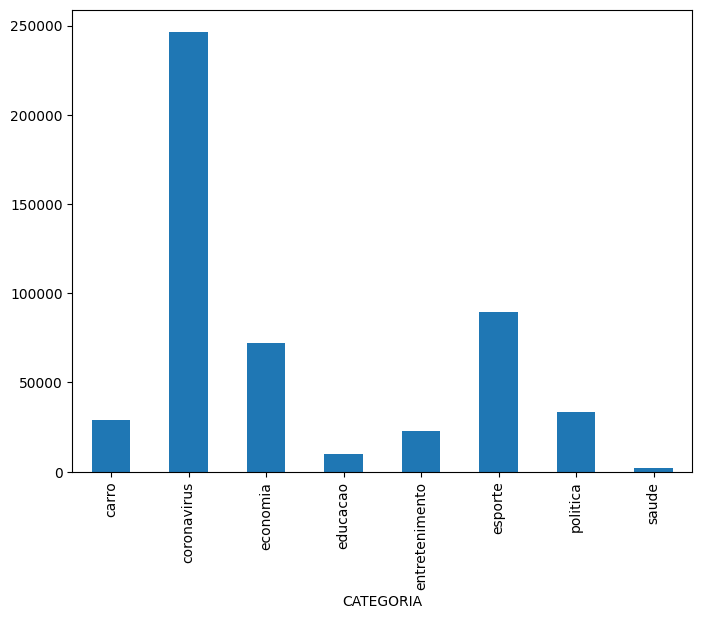

In [ ]:
fig = plt.figure(figsize=(8,6))

df.groupby('CATEGORIA').TEXTO.count().plot.bar()
plt.show()

Um problema recorrente é o **desbalanceamento das classes**.

Os algoritmos convencionais tendem a favorecer as classes mais frequentes, ou seja, não consideram as classes menos frequentes.

As classes menos frequentes costumam ser tratadas como *outliers*.

Estratégias de *undersampling* ou *oversampling* são aplicadas para tratar desse problema.

Lidar com essas estratégias será discutido posteriormente.


### Preparar dataset para que todas as categorias tenham a mesma quantidade de publicações:

Definindo cada categoria com a quantidade igual de artigos por classe (200 artigos).

In [ ]:
TAMANHO_DATASET = 200

In [ ]:
categorias = list(set(df['ID_CATEGORIA']))

data = []
for cat in categorias:
  total = TAMANHO_DATASET
  for c,t,i in zip(df['CATEGORIA'], df['TEXTO'], df['ID_CATEGORIA']):
    if total>0 and cat == i:
      total-=1
      data.append([c,t,i])

df = pd.DataFrame(data, columns=['CATEGORIA','TEXTO','ID_CATEGORIA'])

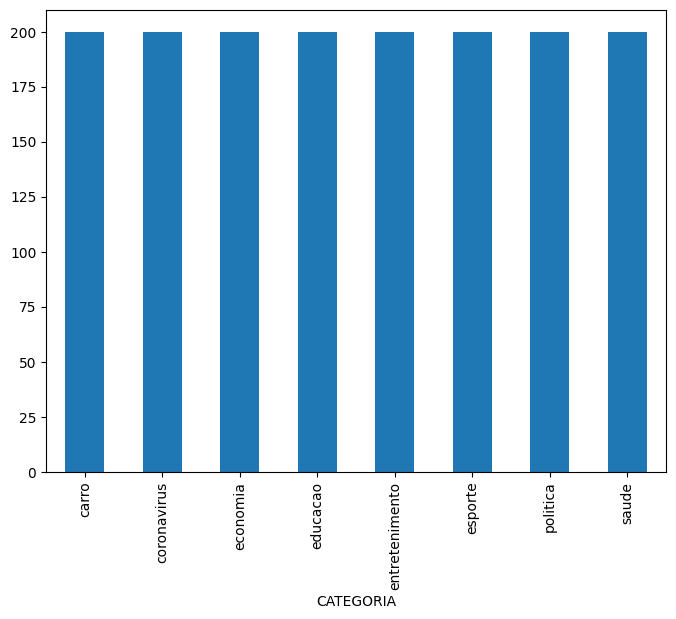

In [ ]:
fig = plt.figure(figsize=(8,6))

df.groupby('CATEGORIA').TEXTO.count().plot.bar(ylim=0)
plt.show()

## Representação do texto:

Os métodos de aprendizagem de máquina lidam melhor com representações numéricas ao invés de representação textual.

Portanto, os textos precisam ser convertidos.

Bag of words é uma forma comum de representar os textos.

Nós vamos calcular a medida de Term Frequency e Inverse Document Frequency, abreviada como TF-IFD.

Nós usaremos o sklearn.feature_extraction.text.TfidfVectorizer para calcular o tf-idf.

### Bag of Words:

É uma representação de texto comumente usada em problemas relacionados com processamento de linguagem natural e recuperação da informação.

sentença 1: "Os brasileiros gostam de futebol"

sentença 2: "Os americanos adoram futebol e adoram basquete"

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

Vamos analisar as sentenças - palavra por palavra:

In [ ]:
sentenca1 = "Os brasileiros gostam de futebol"
sentenca2 = "Os americanos adoram futebol e adoram basquete"

texto1 = word_tokenize(sentenca1)
texto2 = word_tokenize(sentenca2)

print (texto1)
print (texto2)

['Os', 'brasileiros', 'gostam', 'de', 'futebol']
['Os', 'americanos', 'adoram', 'futebol', 'e', 'adoram', 'basquete']


In [ ]:
from nltk.probability import FreqDist

Calcular a quantidade de distribuição:

In [ ]:
fdist1 = FreqDist(texto1)
fdist2 = FreqDist(texto2)

print(fdist1.most_common())
print(fdist2.most_common())

[('Os', 1), ('brasileiros', 1), ('gostam', 1), ('de', 1), ('futebol', 1)]
[('adoram', 2), ('Os', 1), ('americanos', 1), ('futebol', 1), ('e', 1), ('basquete', 1)]


Juntar os termos e montar uma tabela com as palavras e as quantidades em que elas aparecem:

In [ ]:
texto = texto1 + texto2
fdist = FreqDist(texto)
print(fdist.most_common())

[('Os', 2), ('futebol', 2), ('adoram', 2), ('brasileiros', 1), ('gostam', 1), ('de', 1), ('americanos', 1), ('e', 1), ('basquete', 1)]


sentença 1: "Os brasileiros gostam de futebol"

sentença 2: "Os americanos adoram futebol e adoram basquete"

Sentença 1: [1 1 0 1 1 1 0 0 0]

Sentença 2: [1 1 2 0 0 0 1 1 1]

##TF-IDF:

TF = representa a frequência do termo.

IDF = representa o inverso da frequência nos documentos.

### Texto no SKLearn:

Opções (paramêtros) utilizados:

*   `min_df` é o número mínimo de documentos que uma palavra deve estar presente.
* `encoding` é usado para que o classificador consiga lidar com caracteres especiais.
*   `ngram_range` é definida para considerar unigramas e bigramas.
* `stop_words` é definida para reduzir o número de termos indesejáveis.




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tfidf = TfidfVectorizer(min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words('portuguese'))

features = tfidf.fit_transform(df.TEXTO.values.astype('U')).toarray()
labels = df.ID_CATEGORIA
features.shape

(1600, 2044)

## Criação do classificador:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

### Dividir dataset em treino e teste:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['TEXTO'], df['CATEGORIA'], test_size=0.2, random_state = 0)

### Criar um modelo (Naive Bayes):

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Testar o classificador criado:

In [ ]:
sentenca = 'Os estudantes de engenharia demoram o dobro tempo na faculdade.'
print(clf.predict(count_vect.transform([sentenca])))

['esporte']


In [ ]:
sentenca2 = 'O dinheiro da inflação está ultrapassando ...'
print(clf.predict(count_vect.transform([sentenca2])))

['politica']


## Seleção do modelo:

Nós agora vamos experimentar diferentes modelos de aprendizagem de máquina e avaliar a sua acurácia.

Serão considerados os seguintes modelos:
*   Logistic Regression (LR)
*   Multinomial Naive Bayes (NB)
*   Linear Support Vector Machine (SVM)
*   Random Forest (RF)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

Listando os modelos:

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='squared_hinge', max_iter=1000, multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

## Validação cruzada:

A validação cruzada é um método de reamostragem e tem como objetivo avaliar a capacidade de generalização do modelo.

Normalmente é feita co, 3, 5 ou 10 folds;

### Uso de validação cruzada com 5 folds:

In [ ]:
CV = 5

### Geração dos modelos:

In [ ]:
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

## Gráfico BoxPlot:

In [ ]:
import seaborn as sns

<ipython-input-95-c3a06105f4af>:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


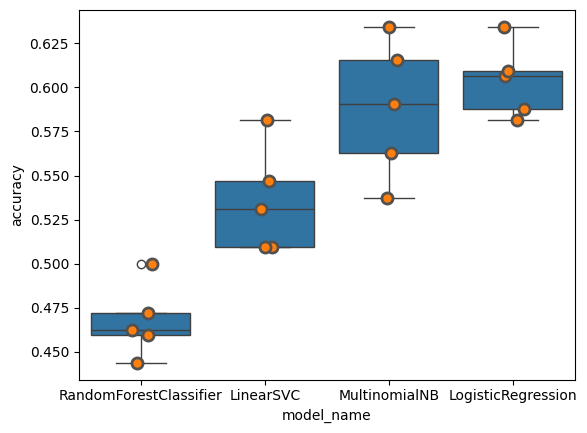

In [ ]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

Rodei 5 vezes de validação cruzada, então são 5 bolinhas (5 valores).

Qual o melhor modelo dos 4?

Avaliar dispersão, acurácia...

### Acurácia média entre os 5 modelos:

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

,accuracy
model_name,
LinearSVC,0.535625
LogisticRegression,0.603750
MultinomialNB,0.588125
RandomForestClassifier,0.467500


Maior acurácia = **Logistic Regression**

## Matriz de confusão:

### Geração de modelo baseado em SVM:

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Plotar matriz de confusão para o modelo SVM:

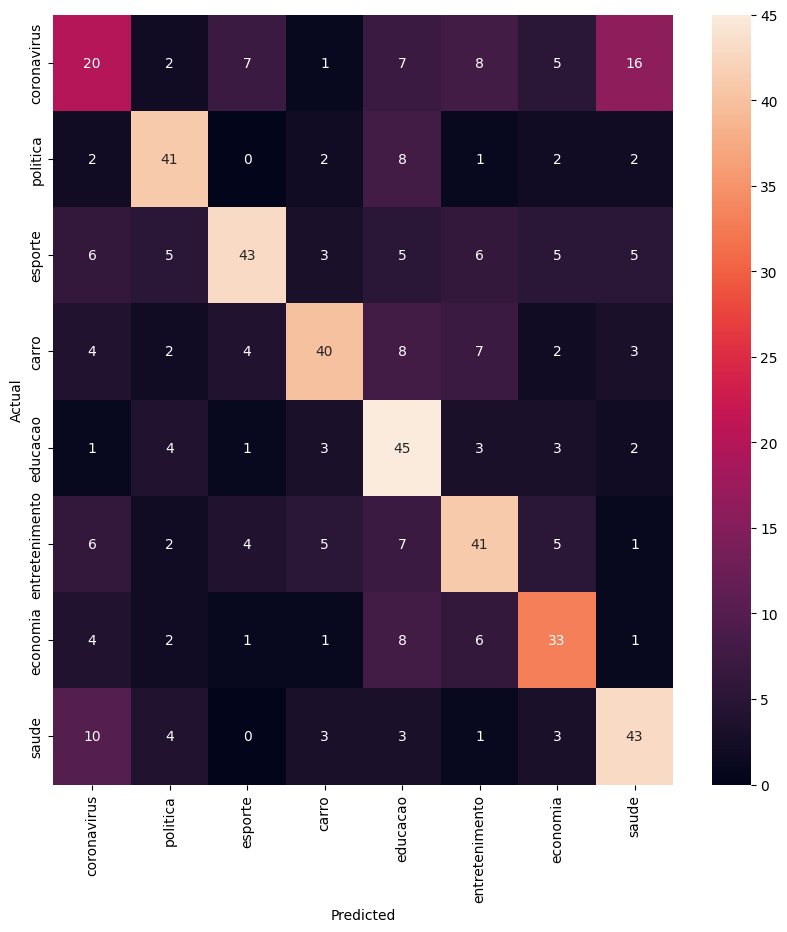

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.CATEGORIA.values, yticklabels=category_id_df.CATEGORIA.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Categoria que o modelo mais está confundindo: 'coronavirus' e 'saúde', devido a proximidade dos textos e palavras em comum.

### Reportar o resultado do classificador em cada classe:

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['CATEGORIA'].unique()))

                precision    recall  f1-score   support

   coronavirus       0.38      0.30      0.34        66
      politica       0.66      0.71      0.68        58
       esporte       0.72      0.55      0.62        78
         carro       0.69      0.57      0.62        70
      educacao       0.49      0.73      0.59        62
entretenimento       0.56      0.58      0.57        71
      economia       0.57      0.59      0.58        56
         saude       0.59      0.64      0.61        67

      accuracy                           0.58       528
     macro avg       0.58      0.58      0.58       528
  weighted avg       0.59      0.58      0.58       528



Melhores resultados = 'política' e 'esporte'.